### Capítulo 4: Treinando Modelos lineares

Neste capítulo estudaremos o funcionamento interno dos modelos. Aprenderemos como funcionam as regressões lineares, tanto calculando "na mão" quanto usando gradiente descendente para convergir para o resultado. Também estudaremos a regressão logística e a regressão softmax, que são dois modelos usados comumente em machine learning.

### Regressao linear
A regresao linear é um modelo que faz uma previsão calculando uma soma ponderada das features com um termo independente chamado de coeficiente linear ou viés.


Para treinar um modelo de regressão linear precisamos encontrar o valor dos parâmetros que melhor se ajuste ao conjunto de treinamento. Para isso, **precisamos de uma função de perda** que nos permita saber o quão perto ou longe estamos desse ajuste. Normalmente usamos a medida de erro quadrático médio (RMSE). Assim, treinar uma regressão linear é encontrar os parâmetros que minimizem a RMSE. 


#### Equação normal

Existe um cálculo matemático (a "forma fechada") para encontrar esses parâmetros.  Faremos aqui a implementação dela.

In [2]:
# vamos gerar valores a partir de uma função e ruído
import matplotlib.pyplot as plt
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4+3 * X + np.random.randn(100,1)

#aqui A e B da equação são 3 e 4. O ruído é proposital para atrapalhar.

In [3]:
X_b = np.c_[np.ones((100,1)),X] # adiciona 1 no X0 em todas as instâncias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.33736777],
       [2.67134118]])

Achou o 3 e o 4 (arredondando, lembrando que tem ruído). Vamos fazer previsões e plotá-las num gráfico:

In [4]:
#realizando predições

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict 

array([[4.33736777],
       [9.68005012]])

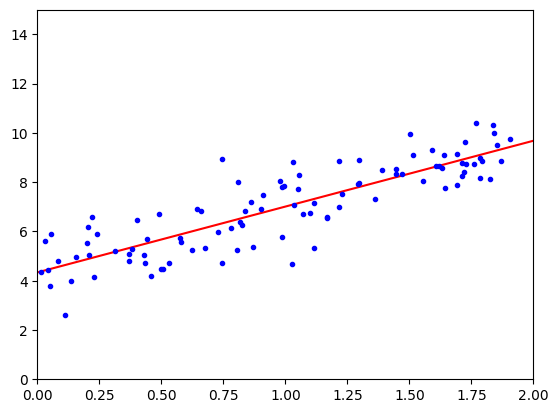

In [5]:
#plotar as predições
plt.plot(X_new, y_predict, "r-", label="previsão do modelo")
plt.plot(X,y, "b.", label = "dados")
plt.axis([0,2,0,15])
plt.show()

O modelo é a linha vermelha. Ele traduz bem os dados. Agora vamos usar o Sklearn para fazer a mesma coisa.

In [6]:
#agora com sklearn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.33736777]), array([[2.67134118]]))

E as previsões:

In [7]:
lin_reg.predict(X_new)

array([[4.33736777],
       [9.68005012]])

Os resultados são iguais.

#### Complexidade computacional

A complexidade computacional desse método (inclusive do sklearn) é O(n^2) - o que significa que dobrar o número de features faz com que o tempo de treinamento seja multiplicado por quatro. Precisamos então de um método de **aproximação** que chegue em um resultado praticamente igual mas com uma fração do custo computacional. Esse método existe: é o gradiente descendente.

#### Gradiente desdendente

O gradiente descendente é um algoritmo de otmização que encontra soluções ótimas para um monte de problemas. Seu funcionamento consiste em navegar pelo espaço de solução de modo a buscar o ponto de menor erro ou perda. Isso é feito interativamente percorrendo esse espaço e percebendo onde há subidas e descidas até que encontre um buraco muito fundo. Nem todas as soluções são ótimas: é possível encontrar um buraco intermediário que acabe impedindo que o algoritmo saia de lá e assim não encontre a solução definitiva. O nome disso é mínimo local. Algumas técnicas de treino permitem evitar esses mínimos, como modular o tamanho do passo que o algoritmo dá para que consiga pular esse mínimo, por exemplo.

In [8]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [9]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24886686]), array([2.66328411]))

Na prática os mesmos coeficientes da forma fechada.

#### Protegendo contra overfiting: regularização para restringir os modelos e melhorar a generalização

Podemos aplicar restrições nos modelos para que eles favoreçam a generalização e portanto combatam o overfiting. Nos modelos lineares temos algumas como Ridge, lasso e elastic net.

#### Regressão Ridge

O algoritmo é forçado a manter os pesos o menor possível.

In [10]:
 from sklearn.linear_model import Ridge

 ridge_reg = Ridge(alpha=1, solver ='cholesky') #alpha 0 é uma regressão linear normal, alto mantém os pesos próximos a zero
 ridge_reg.fit(X,y)
 ridge_reg.predict([[1.5]])

array([[8.30353132]])

In [11]:
sgd_reg = SGDRegressor(penalty="l2") #Se usarmos a penalização L2 então aplica a regularização Ridge
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/home/edu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([8.46177193])

#### Regressão Lasso

A regularização Lasso é quase uma forma de feature selection porque tende a suprimir os pesos das features menos importantes. É a penalidade L1.

In [12]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([8.18675423])

In [13]:
sgd_reg = SGDRegressor(penalty="l1") #Se usarmos a penalização L2 então aplica a regularização Ridge
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/home/edu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([8.46021888])

#### Elastastic net

Um meio termo entre Ridge e Lasso

In [14]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.09366465])

#### Early Stopping

É uma técnica de regularização simples e eficiente que consiste em interromper o treinamento assim que o erro de validação atingir o mínimo.

### Regressão Logística

Modelo para estimar a probabilidade de que uma isntância pertença a uma dada classe. Usa, para isso, a função sigmóide, em formato de S, sendo um número entre 0 e 1.
Depois disso, considera-se um limiar a partir do qual pertence a uma classe ou outra.

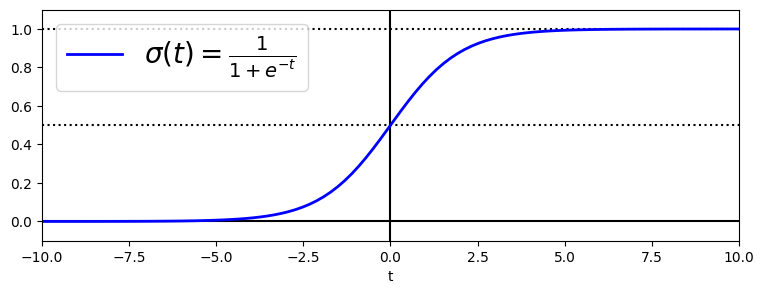

In [22]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Vamos ilustrar a regressão logística a partir do estudo da base Iris, que contém features e labels para classificação de flores em 3 espécies: Iris-setosa, Iris-virginica e Iris-versicolor. Estudaremos as fronteiras de decisão. Nosso classificador vai detectar Iris Virginica.

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [25]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int32)  # 1 if Iris virginica, else 0

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

Agora vamos avaliar as probabilidades estimadas.

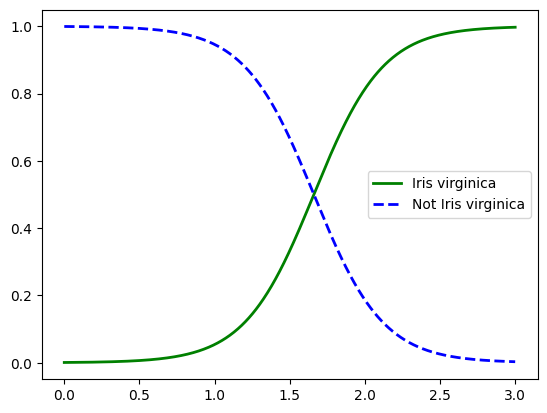

In [33]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]



plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()
plt.show()

In [34]:
decision_boundary

array([1.66066066])

In [35]:
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int32)

#### Regressão Softmax
O modelo de regressão logística pode ser generalizado pare comportar várias classes. Isso se chama modelo de regressão logística multinomial ou Softmax. Primeiro a fronteira de decisão sem softmax.

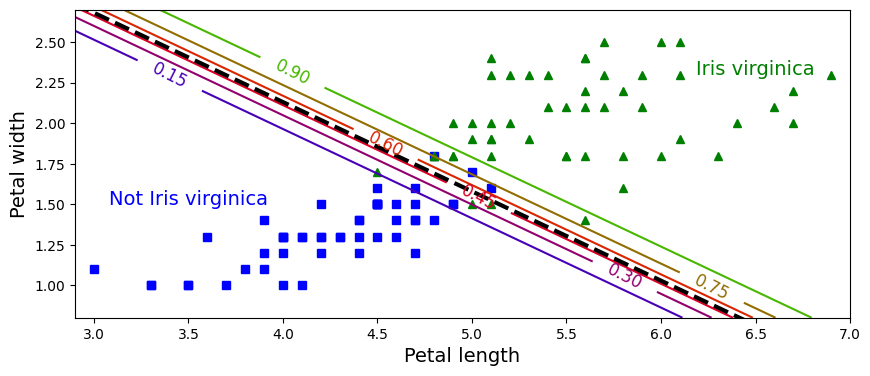

In [37]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

Agora com softmax.

In [38]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

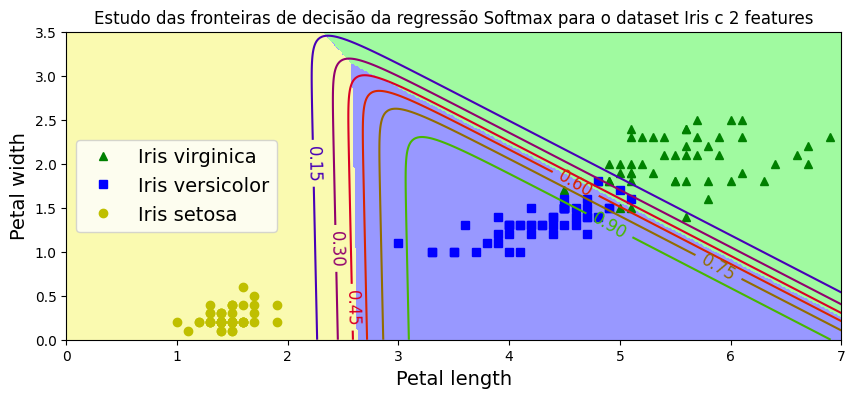

In [41]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.title('Estudo das fronteiras de decisão da regressão Softmax para o dataset Iris c 2 features')
plt.axis([0, 7, 0, 3.5])
plt.show()